In [1]:
import pandas as pd 
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
df= pd.read_csv('car.csv')

In [3]:
df.head()

,Manufacturer,Model,Engine size,Fuel type,Year of manufacture,Mileage,Price
0,Ford,Fiesta,1.0,Petrol,2002,127300,3074
1,Porsche,718 Cayman,4.0,Petrol,2016,57850,49704
2,Ford,Mondeo,1.6,Diesel,2014,39190,24072
3,Toyota,RAV4,1.8,Hybrid,1988,210814,1705
4,VW,Polo,1.0,Petrol,2006,127869,4101


In [4]:
df.isnull().sum()

Manufacturer           0
Model                  0
Engine size            0
Fuel type              0
Year of manufacture    0
Mileage                0
Price                  0
dtype: int64

In [5]:
df.describe()

,Engine size,Year of manufacture,Mileage,Price
count,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.773058,2004.209440,112497.320700,13828.903160
std,0.734108,9.645965,71632.515602,16416.681336
min,1.000000,1984.000000,630.000000,76.000000
25%,1.400000,1996.000000,54352.250000,3060.750000
50%,1.600000,2004.000000,100987.500000,7971.500000
75%,2.000000,2012.000000,158601.000000,19026.500000
max,5.000000,2022.000000,453537.000000,168081.000000


In [6]:
df.nunique()

Manufacturer               5
Model                     15
Engine size               14
Fuel type                  3
Year of manufacture       39
Mileage                44971
Price                  25045
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Manufacturer         50000 non-null  object 
 1   Model                50000 non-null  object 
 2   Engine size          50000 non-null  float64
 3   Fuel type            50000 non-null  object 
 4   Year of manufacture  50000 non-null  int64  
 5   Mileage              50000 non-null  int64  
 6   Price                50000 non-null  int64  
dtypes: float64(1), int64(3), object(3)
memory usage: 2.7+ MB


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

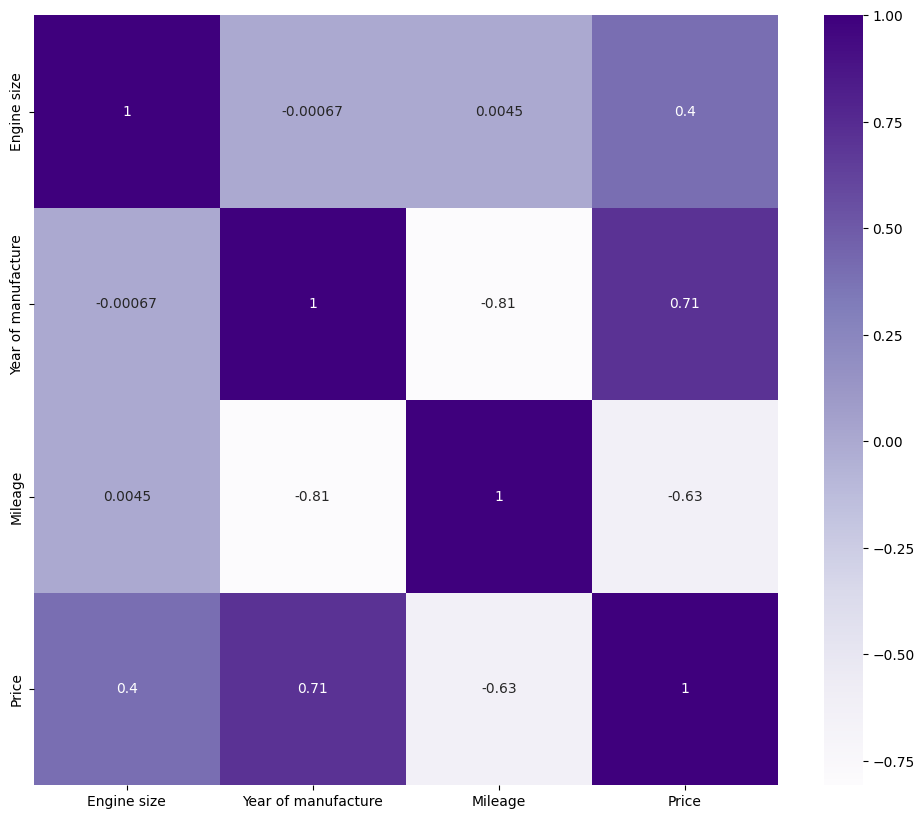

In [9]:
# slicing out only the numerical features from the dataset
num_features = df[['Engine size', 'Year of manufacture', 'Mileage', 'Price']]

# making a correlation object using .corr method
corr = num_features.corr()

# plotting the correlation matrix using seaborn and matplotlib
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(data=corr, cbar='True', cmap='Purples', annot=True)

Creating Subplots of Regplots to see the best numerical predictor of price

In [10]:
df2=df[['Engine size', 'Year of manufacture', 'Mileage']]

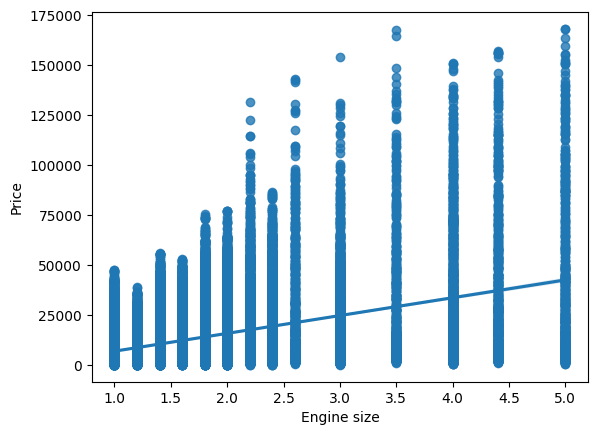

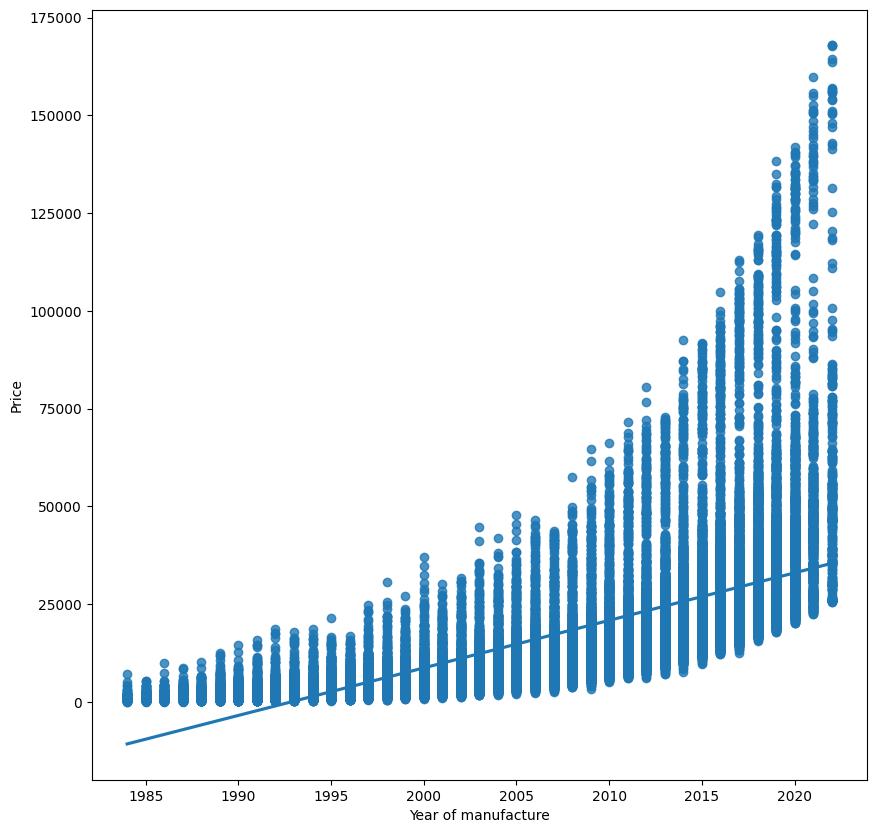

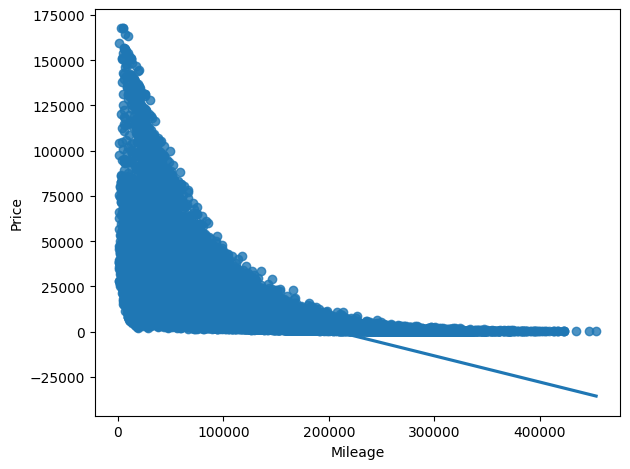

In [11]:
# using subplots for consistency
df2=df[['Engine size', 'Year of manufacture', 'Mileage']]
fig, axs = plt.subplots(1, figsize=(10,10))
# iterating over each numerical value against the price to see the best predictor
for i, col in enumerate(df2):
    plt.figure(i)
    sns.regplot(x=col, y=df['Price'], data=df2)
plt.tight_layout()
plt.show()

In [12]:
df2

,Engine size,Year of manufacture,Mileage
0,1.0,2002,127300
1,4.0,2016,57850
2,1.6,2014,39190
3,1.8,1988,210814
4,1.0,2006,127869
...,...,...,...
49995,5.0,2018,28664
49996,1.8,2003,105120
49997,1.6,2022,4030
49998,1.0,2016,26468


In [13]:
# splitting the data into input features and output features
x = df[['Engine size', 'Year of manufacture', 'Mileage']]
y = df['Price']

# splitting the data into training and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
# checking the dimensions of each subset
print(x_train.shape)
print(x_test.shape)

(40000, 3)
(10000, 3)


Task a

Single Linear Regression

In [15]:
# Making a Linear Reg Model Object
lr_model = LinearRegression()

Training all numerical features against price by iterating over them using single linear regression

In [16]:
lr_results=[]

In [17]:
# creating a for loop to iterate through numerical features and get predictions based off them
for feature in x:
    lr_model.fit(x_train[[feature]], y_train)
    lr_y_hat=lr_model.predict(x_test[[feature]]) #checking the predictions 
    lr_r2=r2_score(y_test, lr_y_hat)
    lr_mse=mean_squared_error(y_test, lr_y_hat)
    
    lr_results.append({
        'Feature': feature,
        'Linear MSE': lr_mse,
        'Linear R²': lr_r2
    })


In [18]:
lr_results

[{'Feature': 'Engine size',
  'Linear MSE': 230499154.45279127,
  'Linear R²': 0.15062562461380213},
 {'Feature': 'Year of manufacture',
  'Linear MSE': 132678999.94793086,
  'Linear R²': 0.5110865244812854},
 {'Feature': 'Mileage',
  'Linear MSE': 162468566.87254104,
  'Linear R²': 0.4013139100884707}]

In [58]:
lr_df = pd.DataFrame(lr_results)
lr_df

,Feature,Linear MSE,Linear R²
0,Engine size,2.304992e+08,0.150626
1,Year of manufacture,1.326790e+08,0.511087
2,Mileage,1.624686e+08,0.401314


Polynomial Linear Regression

In [19]:
# Making a polynomial Reg Model Object
poly = PolynomialFeatures(degree=2)

In [20]:
poly_results=[]

In [21]:
# creating a for loop to iterate through numerical features and get predictions based off them
for feature in x:
    poly_x_train=poly.fit_transform(x_train[[feature]])
    poly_x_test=poly.fit_transform(x_test[[feature]]) 

    lr_model.fit(poly_x_train, y_train)
    y_hat_poly = lr_model.predict(poly_x_test)
    r2_poly = r2_score(y_test, y_hat_poly)
    mse_poly = mean_squared_error(y_test, y_hat_poly)

    poly_results.append({
        'Feature': feature,
        'Polynomial MSE': mse_poly,
        'Polynomial R2': r2_poly
    })   

print(poly_results)

[{'Feature': 'Engine size', 'Polynomial MSE': 230326165.9994689, 'Polynomial R2': 0.15126307580028708}, {'Feature': 'Year of manufacture', 'Polynomial MSE': 105993894.20207708, 'Polynomial R2': 0.6094194015749469}, {'Feature': 'Mileage', 'Polynomial MSE': 129620312.16238311, 'Polynomial R2': 0.5223575898069638}]


In [22]:
poly_df = pd.DataFrame(poly_results)


In [23]:
poly_df

,Feature,Polynomial MSE,Polynomial R2
0,Engine size,2.303262e+08,0.151263
1,Year of manufacture,1.059939e+08,0.609419
2,Mileage,1.296203e+08,0.522358


([0, 1, 2],
 [Text(0, 0, 'Engine size'),
  Text(1, 0, 'Year of manufacture'),
  Text(2, 0, 'Mileage')])

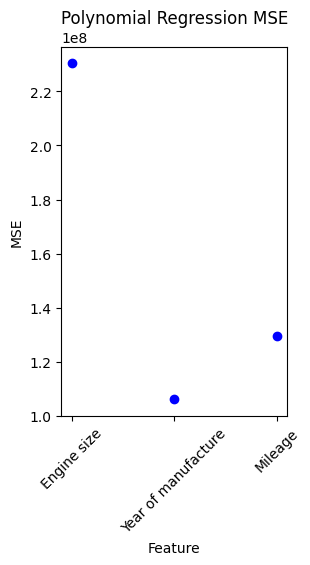

In [24]:
plt.subplot(1, 2, 1)
plt.scatter(poly_df['Feature'], poly_df['Polynomial MSE'], color='blue')
plt.title('Polynomial Regression MSE')
plt.xlabel('Feature')
plt.ylabel('MSE')
plt.xticks(rotation=45)

([0, 1, 2],
 [Text(0, 0, 'Engine size'),
  Text(1, 0, 'Year of manufacture'),
  Text(2, 0, 'Mileage')])

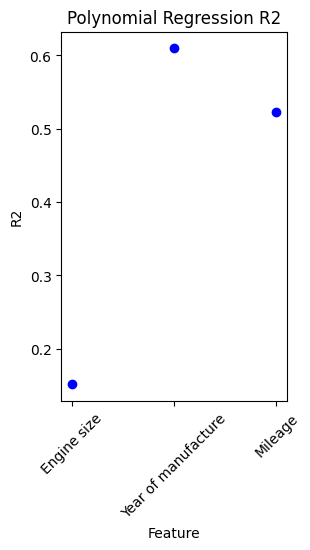

In [25]:
plt.subplot(1, 2, 1)
plt.scatter(poly_df['Feature'], poly_df['Polynomial R2'], color='blue')
plt.title('Polynomial Regression R2')
plt.xlabel('Feature')
plt.ylabel('R2')
plt.xticks(rotation=45)

task b (multiple lr)

In [74]:
# Creating a multiple linear regression model object
mlr_model = LinearRegression()

In [75]:
# Fitting the training subsets on model
mlr_model.fit(x_train, y_train)

LinearRegression()

In [78]:
y_hat=mlr_model.predict(x_test) #checking the predictions 
y_hat

array([38475.21583605, 31096.42421514, 22205.87058164, ...,
       31271.35800272, -5407.42011207, 30709.52672534])

In [79]:
# Calculating r2 and mse values
mlr_mse=mean_squared_error(y_test, y_hat)
r2 = r2_score(y_test, y_hat)

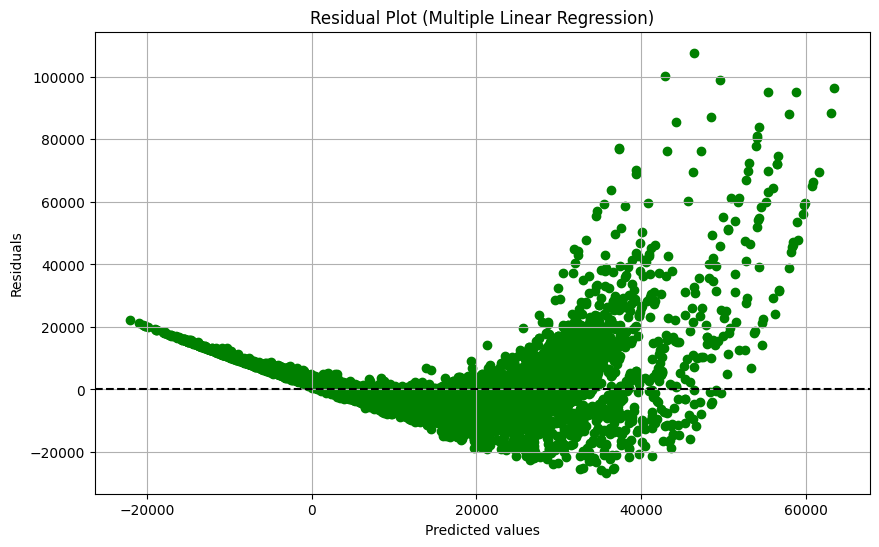

In [80]:
residuals = y_test - y_hat
plt.figure(figsize=(10, 6))
plt.scatter(y_hat, residuals, color='green')
plt.axhline(y=0, color='black', linestyle='--')
plt.title('Residual Plot (Multiple Linear Regression)')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.grid(True)
plt.show()

task 3 (random forest)

In [81]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [82]:
# Separating the input features and predcitor variable
X = df.drop(columns='Price', axis=1)
y = df['Price']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
# num2=df[['Engine size', 'Year of manufacture', 'Mileage']]
cat= ['Manufacturer', 'Model', 'Fuel type']
num = ['Engine size', 'Year of manufacture', 'Mileage']

In [85]:
tr=[('cat', OneHotEncoder(), cat), ('num', StandardScaler(), num)]

In [86]:
col_tr=ColumnTransformer(transformers=tr)
col_tr

ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                 ['Manufacturer', 'Model', 'Fuel type']),
                                ('num', StandardScaler(),
                                 ['Engine size', 'Year of manufacture',
                                  'Mileage'])])

In [87]:
# Creating a pipeline for preprocessing the raw data and applying the model later
pipe = Pipeline(steps=[('pr', col_tr),('regr', RandomForestRegressor(n_estimators=100, random_state=101))])

In [38]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('pr',
                 ColumnTransformer(transformers=[('cat', OneHotEncoder(),
                                                  ['Manufacturer', 'Model',
                                                   'Fuel type']),
                                                 ('num', StandardScaler(),
                                                  ['Engine size',
                                                   'Year of manufacture',
                                                   'Mileage'])])),
                ('regr', RandomForestRegressor(random_state=101))])

In [39]:
y_pred_rf = pipe.predict(X_test)
mse_rf=mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

In [40]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.regularizers import l2

In [41]:
print(X_train.shape, y_train.shape)  # Checking shapes of training data subset
print(X_test.shape, y_test.shape)    # Checking shapes of testing data subset

(40000, 6) (40000,)
(10000, 6) (10000,)


In [42]:
# Applying the preprocessor to transform X into X_processed
X_new = col_tr.fit_transform(X)

# Splitting data into relevant subsets
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42, shuffle=True)

In [43]:
print(X_train.shape, y_train.shape)  # Check shapes of training data subset
print(X_test.shape, y_test.shape)    # Check shapes of testing data subset

(40000, 26) (40000,)
(10000, 26) (10000,)


In [44]:
model = Sequential([Dense(32, activation='relu', input_shape=(X_train.shape[1],), kernel_regularizer=l2(0.001)),
Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
Dense(64, activation='relu', kernel_regularizer=l2(0.001)),
Dense(1, kernel_regularizer=l2(0.001))]) #single layer as our output is a regressor

c:\Users\PMYLS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [46]:
model.fit(X_train, y_train, epochs=100, batch_size=64, validation_split=0.2, verbose=1)

Epoch 1/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - loss: 375922336.0000 - val_loss: 53533028.0000
Epoch 2/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 45918304.0000 - val_loss: 25973362.0000
Epoch 3/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 25459622.0000 - val_loss: 13475610.0000
Epoch 4/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 12261229.0000 - val_loss: 7673327.0000
Epoch 5/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 7809805.0000 - val_loss: 4464600.0000
Epoch 6/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4673501.0000 - val_loss: 2792028.2500
Epoch 7/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - loss: 2732640.7500 - val_loss: 1852959.7500
Epoch 8/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 2086220.5000 - val_loss: 1362215.1250
Epoch 9/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1523294.6250 - val_loss: 1004851.3750
Epoch 10/100
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 1073998.8750 - val_loss: 799344.9375
Ep

In [47]:
y_pred_ann=model.predict(X_test)
mse_ann=mean_squared_error(y_test, y_pred_ann)
r2_ann=r2_score(y_test, y_pred_ann)
print(mse_ann)
print(r2_ann)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
56035.120481894184
0.999793529510498


In [48]:
r2_ann

0.999793529510498

K means Clustering

In [49]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [50]:
scale=StandardScaler()
new=scale.fit_transform(df2)

In [51]:
new.shape

(50000, 3)

In [52]:
new.size

150000

In [53]:
nsamples, nfeatures = new.shape

In [54]:
# initializing an empty list to store scores later on
scores = []

In [55]:
#iterating over different values of k, ranging from 2 to 10
for k in range(2, 11):
# iterating over values of combinations of columns to pick the best
    for i in range(nfeatures):
        for j in range(i + 1, nfeatures):
            norm = new[:, [i, j]]

            kmeans = KMeans(n_clusters=k, random_state=42)
            labels = kmeans.fit_predict(norm)
            sil = silhouette_score(norm, labels)
            scores.append(sil)
            
            print(f"cluster nos = {k}, columns = ({i}, {j}), silhouette score = {sil}")

cluster nos = 2, columns = (0, 1), silhouette score = 0.3704227130105629
cluster nos = 2, columns = (0, 2), silhouette score = 0.3873668235664818
cluster nos = 2, columns = (1, 2), silhouette score = 0.5334978926912568
cluster nos = 3, columns = (0, 1), silhouette score = 0.4596955533294489
cluster nos = 3, columns = (0, 2), silhouette score = 0.4498399871492226
cluster nos = 3, columns = (1, 2), silhouette score = 0.464188897772887
cluster nos = 4, columns = (0, 1), silhouette score = 0.3861882452756013
cluster nos = 4, columns = (0, 2), silhouette score = 0.36991457268579747
cluster nos = 4, columns = (1, 2), silhouette score = 0.41999188538432425
cluster nos = 5, columns = (0, 1), silhouette score = 0.3429773309934312
cluster nos = 5, columns = (0, 2), silhouette score = 0.3536950533036272
cluster nos = 5, columns = (1, 2), silhouette score = 0.41319527385141736
cluster nos = 6, columns = (0, 1), silhouette score = 0.36170454712491884
cluster nos = 6, columns = (0, 2), silhouette sc

In [56]:
scoresdf = pd.DataFrame(scores)
print(scoresdf)

NameError: name 'score' is not defined

compiling all the findings into a dataframe

In [ ]:
results_dict = {
    'Model': ['Single Linear Regression', 'Polynomial Regression', 'Multiple Linear Regression','Random Forest', 'ANN (Loss and MAE)'],
    'Mean Squared Error ': [lr_mse, mse_poly, mlr_mse, mse_rf, mse_ann],
    'R2 Score': [lr_r2, r2_poly, r2, r2_rf, r2_ann]}

In [ ]:
result_df = pd.DataFrame(results_dict)

In [ ]:
result_df.set_index('Model', inplace=True)

In [ ]:
print(result_df)

                            Mean Squared Error   R2 Score
Model                                                    
Single Linear Regression           1.624686e+08  0.401314
Polynomial Regression              1.296203e+08  0.522358
Multiple Linear Regression         8.915862e+07  0.671456
Random Forest                      4.100258e+05  0.998489
ANN (Loss and MAE)                 1.773382e+04  0.999935
